# Linear Models for Regression & Classification

- Ordinary Least Squares Linear Regression

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Odinary Least Squares Linear Regression

`LinearRegression` fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares (RSS) between the observed targets in the dataset, and the targets predicted by the linear approximation.

**Key Limitations:**
- Performs poorly when there are outliers because you are minimizing the sum of squared error. Therefore, any outliers will have a disproportionately large effect.
- Most systems are non-linear. In OLS, linearity is a major assumption.
- Multicollinearity (*more than two explanatory variables are highly linearly related*). Should instead use Ridge Regression or Lasso Regression.
- Heteroskedasticity (*variance of the residual term varies widely*). In the case where data is heteroskedasticity, a weighted least squares could be used.
- Too many independent variables. If the number of features used exceed the number of training data points, the least squares solution will not be unique and the algorithm with fail. 
- Noise in the independent variables

In [8]:
from sklearn.datasets import make_regression

In [17]:
# Generate the regression dataset
X, Y = make_regression(n_features=1, 
                       n_samples=1000,
                       noise=10, 
                      )


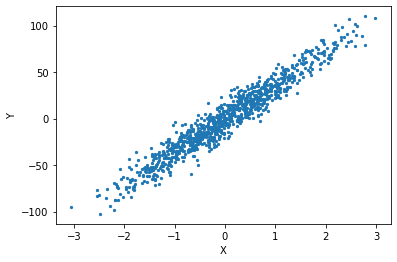

In [18]:
plt.scatter(X, Y, s=5)
plt.xlabel('X'); plt.ylabel('Y');

In [10]:
from sklearn.linear_model import LinearRegression

In [31]:
# Initialize LinearRegression with default hyper-parameters
lr = LinearRegression(fit_intercept=True, 
                      normalize=False, 
                      copy_X=True, 
                      n_jobs=None, 
                      positive=False,
                     )

# Train the model on the data
lr.fit(X, Y)

print(f'coeff = {lr.coef_}')
print(f'intercept = {lr.intercept_}')

# Make predictions
pred = lr.predict(X)

coeff = [35.60333377]
intercept = -0.119842863253101


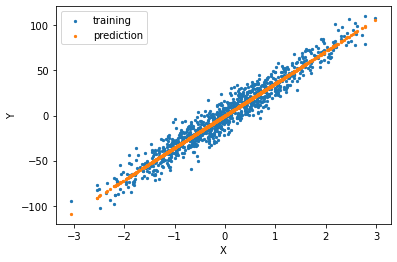

In [32]:
plt.scatter(X, Y, s=5, label='training')
plt.scatter(X, pred, s=5, label='prediction')
plt.xlabel('X'); plt.ylabel('Y')
plt.legend();

## 2. Ridge Regression

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the **l2-norm**. Also known as Ridge Regression or Tikhonov regularization. 

**Objective Function:**
```python
||y - Xw||^2_2 + alpha * ||w||^2_2
```


In [29]:
from sklearn.linear_model import Ridge

In [158]:
# create a dataset
X, y, w = make_regression(n_samples=1000, 
                          n_features=1, 
                          coef=True, 
                          noise=20,
                          random_state=1, 
                          bias=5.5,
                         )

# Initialize Ridge regression with the regularization constant, alpha, set to 0.1
ridge = Ridge(alpha=0.1, 
              fit_intercept=True, 
              normalize=False, 
              copy_X=True, 
              max_iter=None, 
              tol=0.001, 
              solver='auto', 
              random_state=None,
             )

# Train the model on the data
ridge.fit(X, y)

# Train OLS on same data for comparison and to see effect of regularization 
lr = LinearRegression()
lr.fit(X, y)

print(f'Ridge Coeff = {ridge.coef_}\n'
      f'OLR Coeff = {lr.coef_}')

# Make predictions
pred = ridge.predict(X)

Ridge Coeff = [38.25373378]
OLR Coeff = [38.25770873]


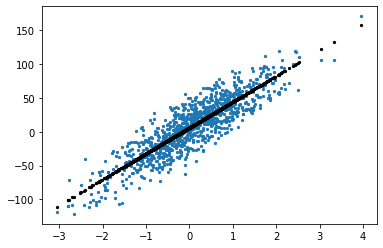

In [159]:
plt.scatter(X, y, s=5)
plt.scatter(X[:,0], pred, s=5, c='k')

#### Effect of alpha on Ridge Regression:

In [152]:
# create a dataset
X, y, w = make_regression(n_samples=10, 
                          n_features=10, 
                          coef=True, 
                          random_state=1, 
                          bias=3.5,
                         )

alpha = np.logspace(-6, 6, 200)

coef = []
for a in alpha:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coef.append(ridge.coef_)

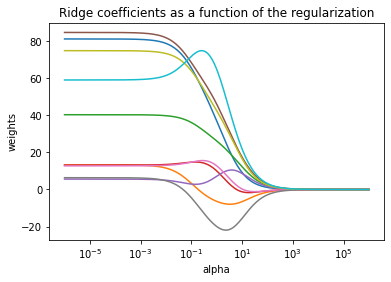

In [153]:
ax = plt.gca()
ax.plot(alpha, coef)
ax.set_xscale('log')
plt.xlabel('alpha'); plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

As alpha gets small (towards zero) the coefficients stabilize towards the randomly sampled vector w (similar to LinearRegression)

As alpha gets big (strong regularization) the coefficients are smaller (eventually converging to 0) leading to a simpler and biased solution. 

## 3. Lasso Regression

Linear Model trained with L1 prior as regularizer.

**Optimization Objective Function:**

```python 
(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
```

In [154]:
from sklearn.linear_model import Lasso

In [155]:
# create a dataset
X, y, w = make_regression(n_samples=10, 
                          n_features=10, 
                          coef=True, 
                          random_state=1, 
                          bias=3.5,
                         )

# Initialize regression
lasso = Lasso(alpha=0.1)

# Train the model on the data
lasso.fit(X,y)

Lasso(alpha=0.1)

## 4. Elastic Net Regression


In [160]:
from sklearn.linear_model import ElasticNet

In [162]:
# create a dataset
X, y, w = make_regression(n_samples=10, 
                          n_features=10, 
                          coef=True, 
                          random_state=1, 
                          bias=3.5,
                         )

# Initialize regression
en = ElasticNet(alpha=0.1)

# Train the model on the data
en.fit(X,y)

ElasticNet(alpha=0.1)

## 5. Logistic Regression


In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

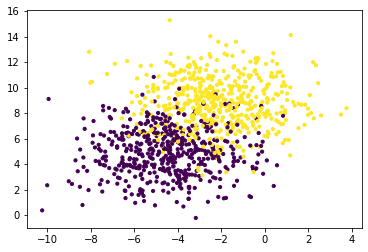

In [165]:
X, y = make_blobs(n_features=2,
                  n_samples=1000,
                  cluster_std=2, 
                  centers=2,
                 )

plt.scatter(X[:,0], X[:,1], s=10, c=y)

In [168]:
h = 0.02
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [169]:
lr = LogisticRegression()
lr.fit(X, y)
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

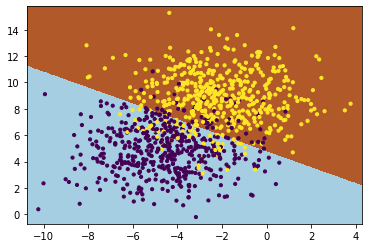

In [172]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
plt.scatter(X[:,0], X[:,1], c=y, s=10)